<a href="https://colab.research.google.com/github/RoseSarlake/spectral-image/blob/main/White_correction_advanced_(Specim_scanner_case).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Copyright (C) 2021 by Dmitry Semenov <dmitry.semenov@uef.fi>
#
# Permission to use, copy, modify, and/or distribute this software for any
# purpose with or without fee is hereby granted.
#
# THE SOFTWARE IS PROVIDED "AS IS" AND THE AUTHOR DISCLAIMS ALL WARRANTIES WITH
# REGARD TO THIS SOFTWARE INCLUDING ALL IMPLIED WARRANTIES OF MERCHANTABILITY
# AND FITNESS. IN NO EVENT SHALL THE AUTHOR BE LIABLE FOR ANY SPECIAL, DIRECT,
# INDIRECT, OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER RESULTING FROM
# LOSS OF USE, DATA OR PROFITS, WHETHER IN AN ACTION OF CONTRACT, NEGLIGENCE OR
# OTHER TORTIOUS ACTION, ARISING OUT OF OR IN CONNECTION WITH THE USE OR
# PERFORMANCE OF THIS SOFTWARE.

Second part

In [ ]:
import matplotlib.pyplot as plt
import numpy

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import os
dir_path = "/content/drive/MyDrive/summer school/Lectures+Exercises/LectureExercise #7.2, White correction/Spectral files/ColorChecker_8_binning/capture/"
myDir = os.listdir(dir_path)
print(myDir)

hdr_path = "/content/drive/MyDrive/summer school/Lectures+Exercises/LectureExercise #7.2, White correction/Spectral files/ColorChecker_8_binning/capture/Colorchecker.hdr"
f=open(hdr_path, "r")
filelines = f.readlines()

print(filelines[0:100])


['dark.hdr', 'dark.raw', 'white.hdr', 'white.raw', 'Colorchecker.hdr', 'Colorchecker.raw']
['ENVI\n', 'description = {\n', 'File Imported into ENVI}\n', 'file type = ENVI\n', '\n', 'sensor type = sCMOS , Lumo - Scanner v1.4.2015-338\n', 'acquisition date = DATE(yyyy-mm-dd): 2019-05-10\n', '\n', 'samples = 2144\n', 'bands = 135\n', 'lines = 1357\n', '\n', 'errors = {none}\n', '\n', 'interleave = bil\n', 'data type = 12\n', 'header offset = 0\n', 'byte order = 0\n', 'x start = 0\n', 'y start = 0\n', 'default bands = {65, 42, 17}\n', '\n', 'himg = {1, 2144}\n', 'vimg = {1, 135}\n', 'hroi = {1, 2144}\n', 'vroi = {1, 135}\n', '\n', 'fps = 40.00\n', 'fps_qpf = 40.12\n', 'tint = 20.003380\n', 'binning = {8, 1}\n', 'trigger mode = Internal\n', 'trigger sync = true\n', 'fodis = {0, 0}\n', 'sensorid = 560007\n', 'acquisitionwindow left = 216\n', 'acquisitionwindow top = 560\n', 'calibration pack = C:/Users/asennus/Documents/Specim/560007_20160620_OL23.scp\n', '\n', 'VNIR temperature = 26.54\n', 

**readDir()** function reads the 'dir_path'and returns:
'object_raw' - object raw file path

1.   'object_raw' - object raw file path
2.   'object_hdr' - object hdr file path
3.   'white_raw'  - white raw file path
4.   'white_hdr'  - white hdr file path
5.  'dark_raw'   - dark raw file path
6.  'dark_hdr'   - dark hdr file path

**read_hdr()** reads hdr file content and returns:
1. samples
2. bands
3. lines
4. waves - and array of wavelengths from hdr file. Size of bands.

In [ ]:
# read dir and search for WHITE, DARK and OBJECT (RAW and HDR)
def readDir(dir_path):
    myDir = os.listdir(dir_path)
    dark_hdr =[]
    dark_raw=[]
    white_hdr=[]
    white_raw=[]
    for file in myDir:
        if 'dark' in file.lower() and 'hdr' in file.lower():
            #dark_hdr = dir_path + '/' + file
            dark_hdr = os.path.join(dir_path, file)
        if 'dark' in file.lower() and 'raw' in file.lower():
            #dark_raw = dir_path + '/' + file
            dark_raw = os.path.join(dir_path, file)
        if 'white' in file.lower() and 'hdr' in file.lower():
            #white_hdr = dir_path + '/' + file
            white_hdr = os.path.join(dir_path, file)
        if 'white' in file.lower() and 'raw' in file.lower():
            #white_raw = dir_path + '/' + file
            white_raw = os.path.join(dir_path, file)
        if (not 'white' in file.lower()) and (not 'dark' in file.lower()) and 'hdr' in file.lower():
            #object_hdr = dir_path + '/' + file
            object_hdr = os.path.join(dir_path, file)
        if (not 'white' in file.lower()) and (not 'dark' in file.lower()) and 'raw' in file.lower():
            #object_raw = dir_path + '/' + file
            object_raw = os.path.join(dir_path, file)
    return object_raw, object_hdr, white_raw, white_hdr, dark_raw, dark_hdr  
import os
import numpy

##### Read HDR content
def read_hdr(hdr_path):
    f=open(hdr_path, "r")
    filelines = f.readlines()
    #print(filelines)
    f.close()
    bands = ''
    for fileline in filelines:
        #print(fileline)
        if 'samples' in fileline.lower():
            samples = int(fileline.replace('samples = ',''))
            print(samples)
        if bands =='' and 'bands' in fileline.lower():
            bands = int(fileline.replace('bands = ',''))
        if 'lines' in fileline.lower():
            lines = int(fileline.replace('lines = ',''))
    # read waves   
    print(samples, lines, bands)
    n = 0
    for fileline in filelines:
        if 'th = {' in fileline.lower():
          print(n)
          n1 = n+1
        n = n + 1
    n2 = n1 + bands
    print(n1)
    print(n2)
    waves = numpy.zeros(n2-n1,)
    n = 0
    for i in range(n1, n2):
        #print(filelines[i])
        waves[n] = float(filelines[i].replace(',',''))
        #print(waves[n])
        n = n + 1
    
    return samples, bands, lines, waves     




'path' is a path to 'capture' folder
the code reads 'spectral_image'

In [ ]:
# Read hdr
path = "/content/drive/MyDrive/summer school/Lectures+Exercises/LectureExercise #7.2, White correction/Spectral files/ColorChecker_8_binning/capture/"

#myDir = os.listdir(path)
[object_raw, object_hdr, white_raw, white_hdr, dark_raw, dark_hdr ] = readDir(path)
print(object_raw)
[samples, bands, lines, waves] = read_hdr(object_hdr)

open_path = object_raw
# Read raw
fopen = open(open_path, "rb")
raw_image = numpy.fromfile(fopen, dtype=numpy.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
spectral_image = numpy.reshape(raw_image, (lines, bands, samples))
print('spectral_image.shape: ', spectral_image.shape)
'''
savepath = "/content/drive/My Drive/waves.raw"
fileobj = open(savepath, mode='wb')
waves.tofile(fileobj)
fileobj.close()
print(waves.dtype)
'''

/content/drive/MyDrive/summer school/Lectures+Exercises/LectureExercise #7.2, White correction/Spectral files/ColorChecker_8_binning/capture/Colorchecker.raw
2144
2144 1357 135
54
55
190
spectral_image.shape:  (1357, 135, 2144)


'\nsavepath = "/content/drive/My Drive/waves.raw"\nfileobj = open(savepath, mode=\'wb\')\nwaves.tofile(fileobj)\nfileobj.close()\nprint(waves.dtype)\n'

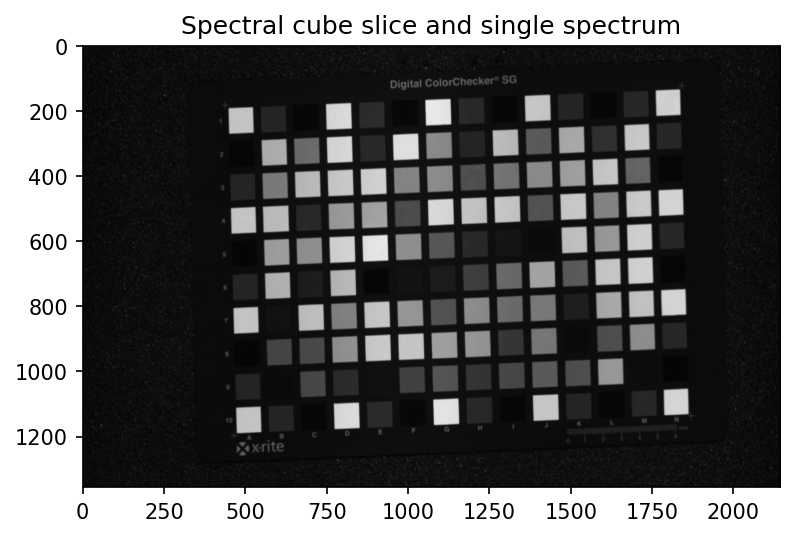

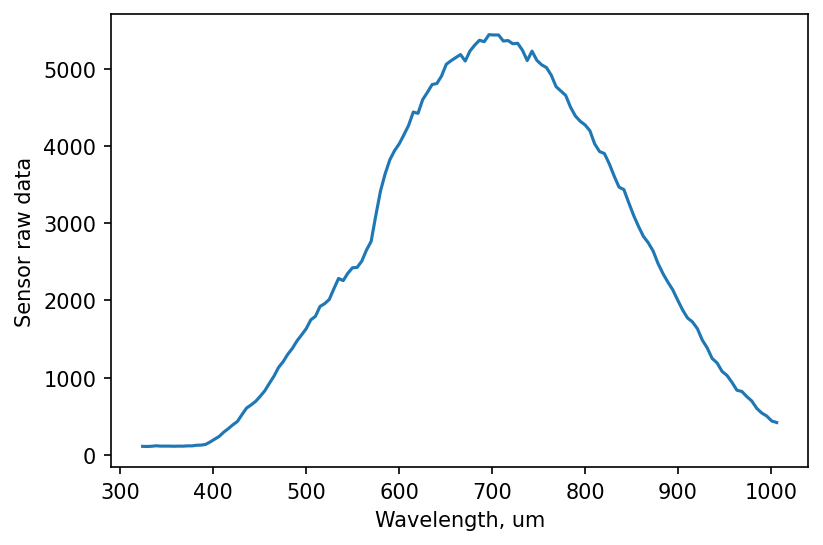

In [ ]:
# Plot picture and spectrum
plt.rcParams['figure.dpi'] = 150

plt.imshow(spectral_image[:,100,:], cmap="gray", vmin=0, vmax=40700)#
plt.title('Spectral cube slice and single spectrum')
plt.show()

plt.plot(waves, spectral_image[100,:,100])#
plt.xlabel('Wavelength, um')
plt.ylabel('Sensor raw data')


plt.show()



White correction
Read White and Dark

/content/drive/MyDrive/summer school/Lectures+Exercises/LectureExercise #7.2, White correction/Spectral files/ColorChecker_8_binning/capture/white.hdr
2144
2144 234 135
54
55
190
2144 135 234


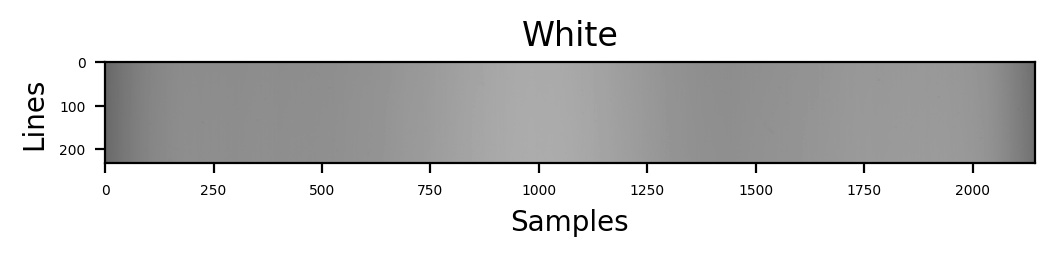

2144
2144 100 135
54
55
190


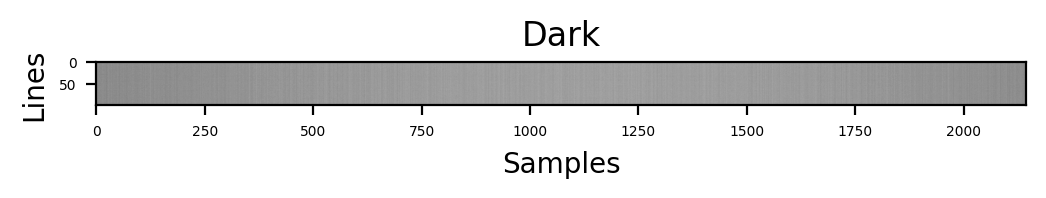

In [ ]:
# Read White
print(white_hdr)
[samples, bands, lines, waves] = read_hdr(white_hdr)
print(samples, bands, lines)
open_path = white_raw
fopen = open(open_path, "rb")
raw_image = numpy.fromfile(fopen, dtype=numpy.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
white_image = numpy.reshape(raw_image, (lines, bands, samples))/lines
plt.rcParams['figure.dpi'] = 200
plt.imshow(white_image[:,100,:], cmap="gray", vmin=0, vmax=250)#
plt.title("White")
plt.xlabel('Samples')
plt.ylabel('Lines')
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()
###############################################
# Read Dark
[samples, bands, lines, waves] = read_hdr(dark_hdr)
open_path = dark_raw
fopen = open(open_path, "rb")
raw_image = numpy.fromfile(fopen, dtype=numpy.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
dark_image = numpy.reshape(raw_image, (lines, bands, samples))/lines
plt.rcParams['figure.dpi'] = 200
plt.imshow(dark_image[:,100,:], cmap="gray", vmin=0, vmax=2)#
plt.title("Dark")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.xlabel('Samples')
plt.ylabel('Lines')
plt.show()


Show white and dark in Freelook

(234, 135, 2144)
(135, 2144)


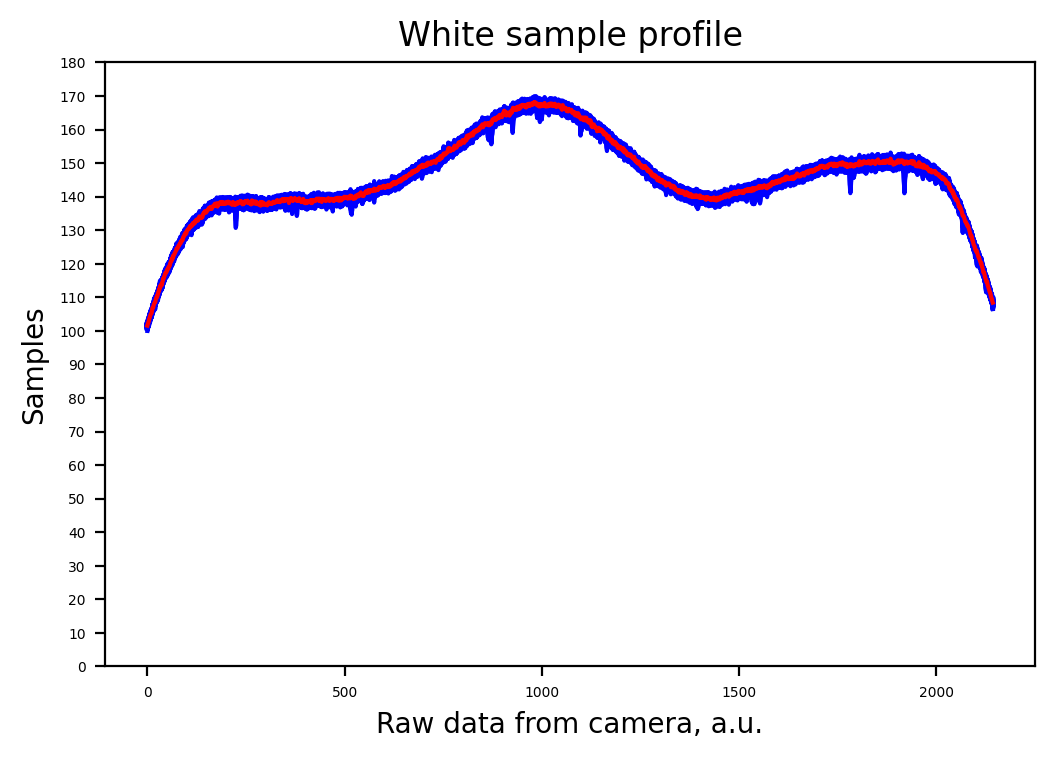

In [ ]:
print(white_image.shape)
for i in range(1,200):
  plt.plot(white_image[i,100,:],'b')

white_av = numpy.sum(white_image, axis = 0)/234 # get average for White
print(white_av.shape)
plt.rcParams['figure.dpi'] = 200
plt.plot(white_av[100,:],'r')
plt.yticks(range(0, 190, 10))
plt.title("White sample profile")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.xlabel('Raw data from camera, a.u.')
plt.ylabel('Samples')
plt.show()


plt.show()



In [ ]:
# Calculate average for Dark and White

# Spectral_cube = upper_part/lower_part
# upper_part = spectral_image-dark
# lower_part = white - dark

white_av = numpy.sum(white_image, axis = 0) # get average for White
#print(white_image.shape)
#print(white_av.shape)
dark_av = numpy.sum(dark_image, axis = 0) # get average for White
#print(dark_image.shape)
#print(dark_av.shape)

[lines, bansd, samples] = spectral_image.shape
print(spectral_image.shape)
upper_part = numpy.zeros((lines, bansd, samples), dtype=numpy.float32)
spectral_cube = numpy.zeros((lines, bansd, samples), dtype=numpy.float32)
# Subtract [image - dark]
for i in range(lines):
  upper_part[i,:,:] = numpy.subtract(spectral_image[i,:,:], dark_av) 
# Subtract [white - dark]
lower_part = numpy.subtract(white_av, dark_av) 
# Subtract [image - dark]
for i in range(lines):
  spectral_cube[i,:,:] = numpy.divide(upper_part[i,:,:], lower_part)
# spectral_cube[:,:,:]  a white corrected spectral cube





(1357, 135, 2144)


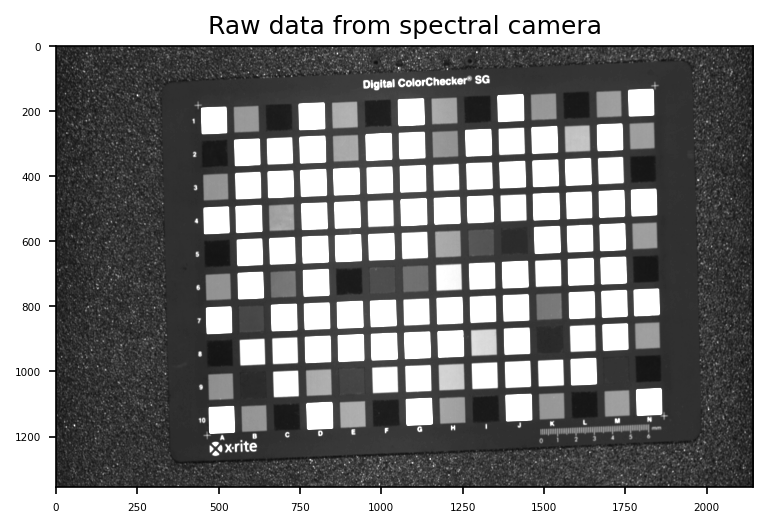

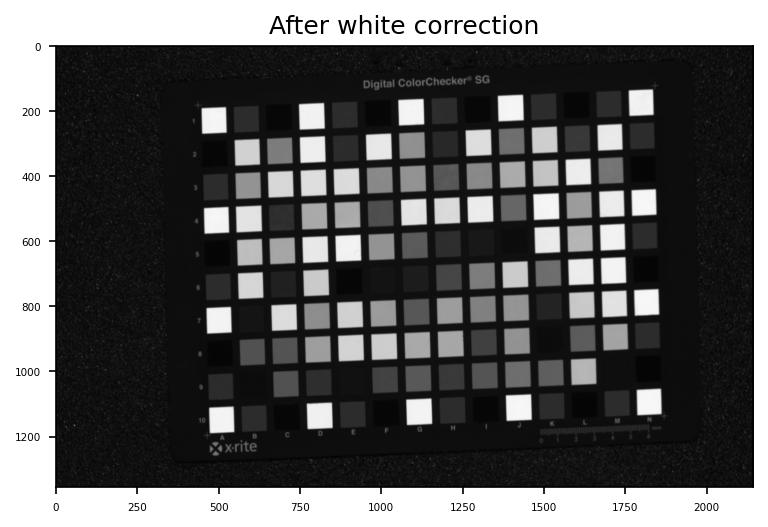

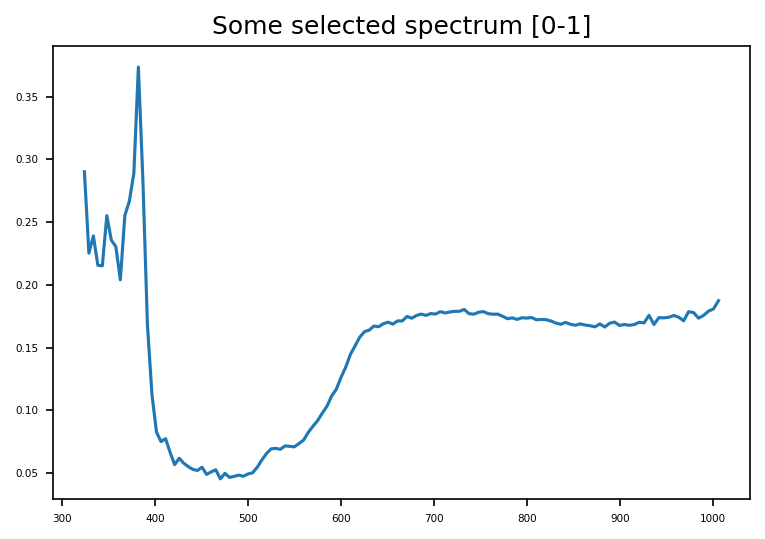

In [ ]:
# Plot results before and after white correction
plt.rcParams['figure.dpi'] = 150
plt.imshow(spectral_image[:,100,:], cmap="gray", vmin=0, vmax=10050)#
plt.title("Raw data from spectral camera")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()
plt.imshow(spectral_cube[:,100,:], cmap="gray", vmin=0, vmax= 1)#
plt.title("After white correction")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()
plt.plot(waves, spectral_cube[300,:,900])#
plt.title("Some selected spectrum [0-1]")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()

#up_part = spectral_image - dark_av
#low_part = white_av - dark_av
#print(numpy.amax(spectral_image))
#print(numpy.amax(dark_av))
#print(numpy.amax(spectral_cube))

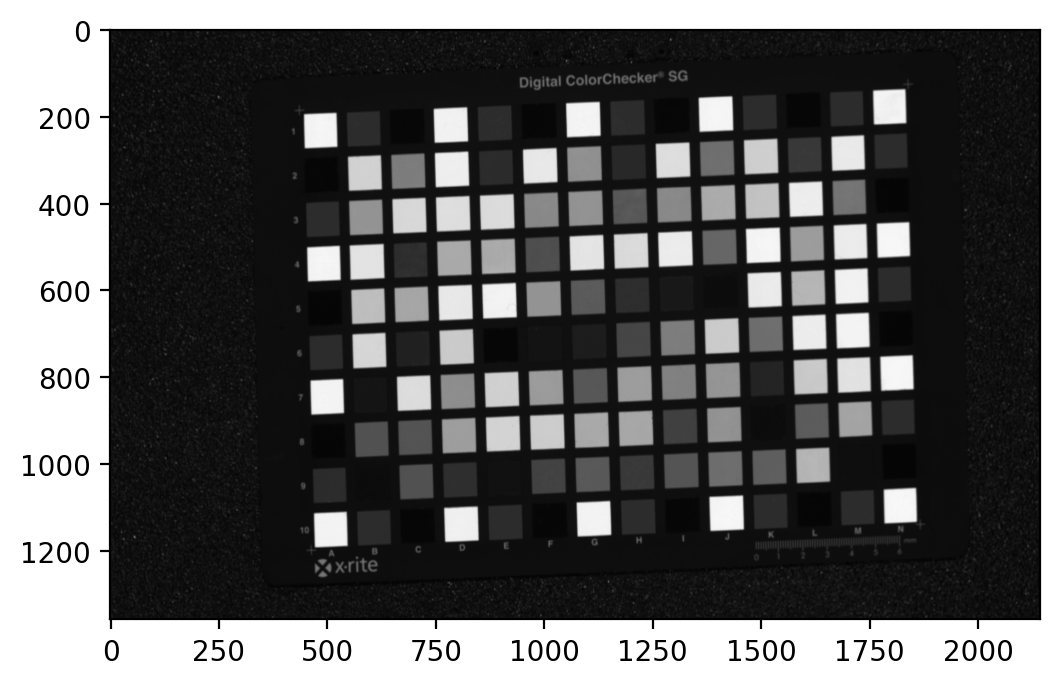

In [ ]:
# Show grey scale image
# plt.rcParams['figure.dpi'] = 50, make it bigger to get bigger image
plt.rcParams['figure.dpi'] = 200
plt.imshow(spectral_cube[:,100,:], cmap="gray", vmin=0, vmax=1)#

plt.show()

645.55
529.72
435.69


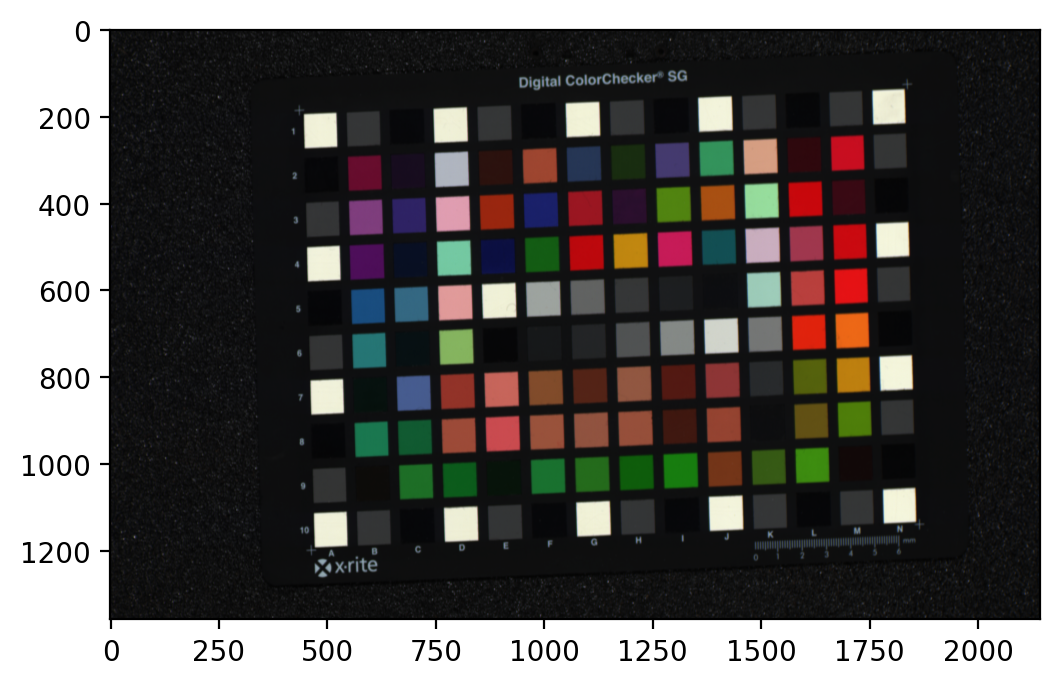

In [ ]:
# Show RGB image
# plt.rcParams['figure.dpi'] = 50, make it bigger to get bigger image
RGB = numpy.empty((lines, samples, 3), dtype=numpy.float32)
ch_1 = 65
ch_2 = 42
ch_3 = 23
print(waves[ch_1])
print(waves[ch_2])
print(waves[ch_3])
#RGB[:,:,0] = spectral_image[:,ch_1,:]/numpy.amax(spectral_image[:,ch_1,:])
#RGB[:,:,1] = spectral_image[:,ch_2,:]/numpy.amax(spectral_image[:,ch_2,:])
#RGB[:,:,2] = spectral_image[:,ch_3,:]/numpy.amax(spectral_image[:,ch_3,:])
RGB[:,:,0] = spectral_cube[:,ch_1,:]
RGB[:,:,1] = spectral_cube[:,ch_2,:]
RGB[:,:,2] = spectral_cube[:,ch_3,:]
plt.rcParams['figure.dpi'] = 200
plt.imshow(RGB)

plt.show()


Lower part should be deleted, it is in next lecture






































Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.11179102 0.10695896 0.15236154]


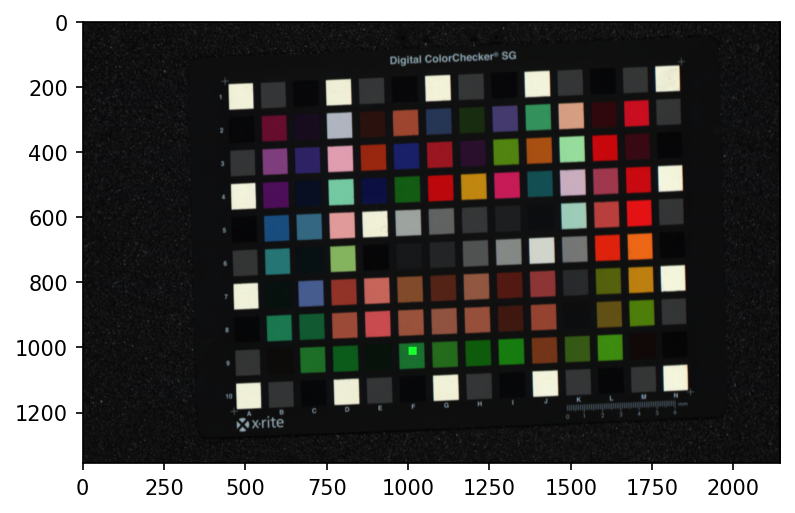

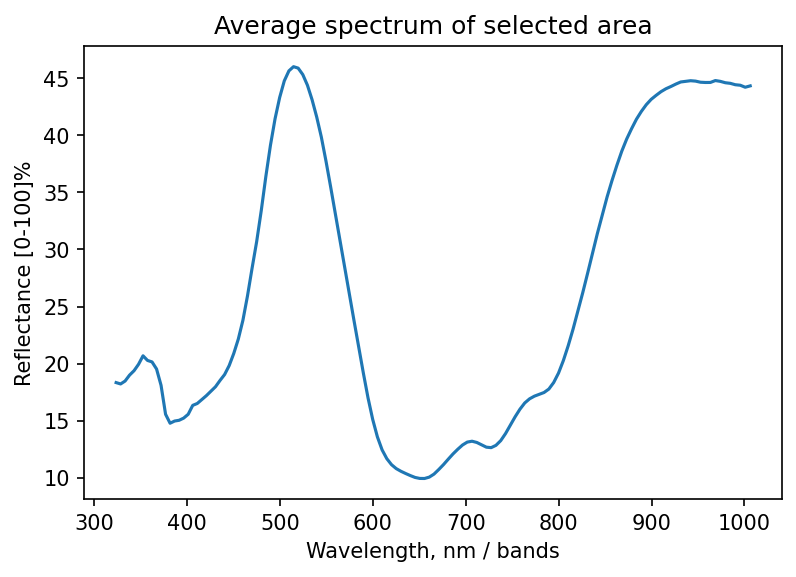

In [ ]:
# Selct area and plot its avearage spectrum
print(RGB[100,100,:])
RGB2 = RGB.copy()
##################################################################
# Select plastic leaf
x1, x2, y1, y2  = 1000, 1025, 1000,1025 # green
#x1, x2, y1, y2  = 700, 725, 1600,1625 # Red

RGB2[x1:x2,y1:y2,1] = 255
sel = spectral_cube[x1:x2,:,y1:y2]
#print(spectral_cube.shape)
#print(plastic.shape)

sel1 = numpy.sum(sel, axis = 0)
#print(pl1.shape)
selection1 = numpy.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
#print(pl2.shape)

##################################################################

plt.imshow(RGB2)
plt.rcParams['figure.dpi'] = 150
plt.show()

#plt.plot(selection1) 
plt.plot(waves,selection1*100)
plt.xlabel('Wavelength, nm / bands')
plt.ylabel('Reflectance [0-100]%')
plt.title("Average spectrum of selected area")


plt.show()

# save 
saveraw = "/content/drive/MyDrive/summer school/savedata/green.raw"
fileobj = open(saveraw, mode='wb')
selection1.tofile(fileobj)
fileobj.close()

